In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [8]:
# Task 1: Exploratory Data Analysis (EDA)
# Load dataset (replace 'your_dataset.csv' with the actual filename)
df = pd.read_csv(r"C:\Users\belag\OneDrive\Desktop\DATA SCIENCE(13th Jan 2025 9.30 am, Ganashree)\Assighnments\PCA\wine.csv")
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  17

<Figure size 1200x600 with 0 Axes>

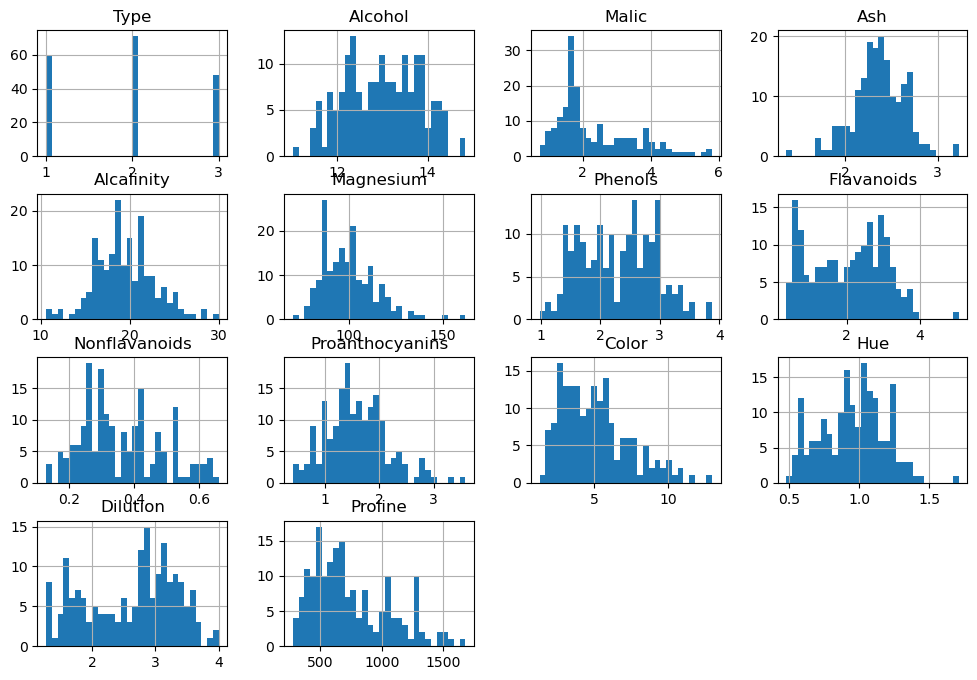

In [10]:
# Visualize feature distributions
plt.figure(figsize=(12, 6))
df.hist(figsize=(12, 8), bins=30)
plt.show()


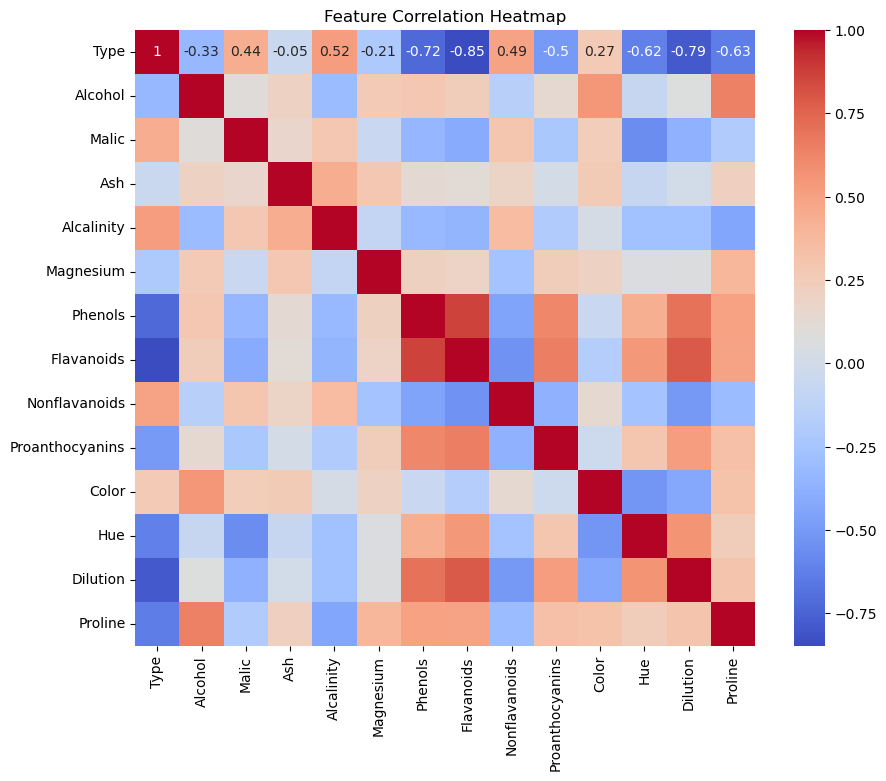

In [12]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [16]:

# Task 2: Dimensionality Reduction with PCA
# Standardize the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [18]:
# Apply PCA
pca = PCA()
pca.fit(df_scaled)


PCA()

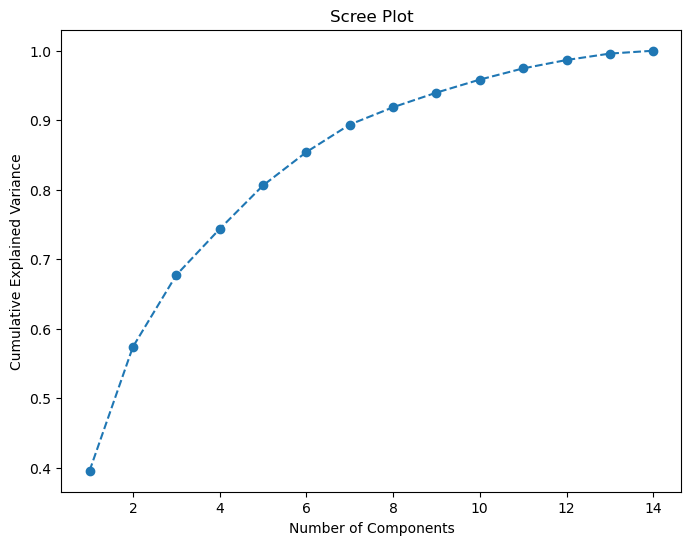

In [20]:
# Scree plot for choosing the number of components
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

In [22]:

# Choose optimal number of components (e.g., 95% explained variance)
pca_opt = PCA(n_components=0.95)
df_pca = pca_opt.fit_transform(df_scaled)
print(f'Number of components chosen: {pca_opt.n_components_}')

Number of components chosen: 10


In [24]:

# Task 3: Clustering with Original Data
kmeans = KMeans(n_clusters=3, random_state=42)  # Change clusters as needed
clusters_original = kmeans.fit_predict(df_scaled)

C:\Users\belag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
# Evaluate clustering
silhouette_original = silhouette_score(df_scaled, clusters_original)
dbi_original = davies_bouldin_score(df_scaled, clusters_original)
print(f'Silhouette Score (Original Data): {silhouette_original}')
print(f'Davies-Bouldin Index (Original Data): {dbi_original}')

Silhouette Score (Original Data): 0.30648398324833453
Davies-Bouldin Index (Original Data): 1.315707552261773


In [28]:

# Task 4: Clustering with PCA Data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(df_pca)


C:\Users\belag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [30]:

# Evaluate clustering with PCA data
silhouette_pca = silhouette_score(df_pca, clusters_pca)
dbi_pca = davies_bouldin_score(df_pca, clusters_pca)
print(f'Silhouette Score (PCA Data): {silhouette_pca}')
print(f'Davies-Bouldin Index (PCA Data): {dbi_pca}')

Silhouette Score (PCA Data): 0.32292055407233006
Davies-Bouldin Index (PCA Data): 1.2578453408449175


In [34]:

# Task 5: Comparison and Analysis
print("Comparison of Clustering Results:")
print(f'Silhouette Score Difference: {silhouette_pca - silhouette_original}')
print(f'Davies-Bouldin Index Difference: {dbi_pca - dbi_original}')


Comparison of Clustering Results:
Silhouette Score Difference: 0.016436570823995522
Davies-Bouldin Index Difference: -0.057862211416855436


In [ ]:

# Task 6: Conclusion and Insights
print("\nConclusion:")
print("PCA helped reduce dimensions while preserving variance, improving clustering efficiency.")
